In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | rocha
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | krapkowice
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | astoria
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | boende
Processing Record 17 of Set 1 | dicabisagan
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | ouro preto do oeste
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | chegdomyn
Processing Record 42 of Set 4 | langsa
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | crixas
Processing Record 45 of Set 4 | kirakira
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | galgani
City not found. Skipping...
Processing Record 49 of Set 4 | ulladulla
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | urdzhar
City not found. Skipping...
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | tokoroa
Processing Record 6 of Set 5 | saint-augustin
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | surt
Processing Record 9 of Set 5 | olinda
Processing Record 10 of Set 5 | carutapera
Processing Record 11 of Set 5 | palabuha

Processing Record 27 of Set 8 | san carlos de bariloche
Processing Record 28 of Set 8 | osorno
Processing Record 29 of Set 8 | shaowu
Processing Record 30 of Set 8 | panaba
Processing Record 31 of Set 8 | aranos
Processing Record 32 of Set 8 | kismayo
Processing Record 33 of Set 8 | mackenzie
Processing Record 34 of Set 8 | chirgaon
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | bandiagara
Processing Record 37 of Set 8 | porto belo
Processing Record 38 of Set 8 | terney
Processing Record 39 of Set 8 | vasteras
Processing Record 40 of Set 8 | kuruman
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | quebo
Processing Record 43 of Set 8 | dalvik
Processing Record 44 of Set 8 | manaus
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 8 | ust-omchug
Processing Record 47 of Set 8 | ketchikan
Processing Record 48 of Set 8 | puerto carreno
Processing Record 49 of Set 8 | sembakung
Processing Recor

Processing Record 10 of Set 12 | zagon
Processing Record 11 of Set 12 | beloha
Processing Record 12 of Set 12 | havelock
Processing Record 13 of Set 12 | hokitika
Processing Record 14 of Set 12 | natal
Processing Record 15 of Set 12 | necochea
Processing Record 16 of Set 12 | cayenne
Processing Record 17 of Set 12 | qasigiannguit
Processing Record 18 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 19 of Set 12 | maracaju
Processing Record 20 of Set 12 | biaora
Processing Record 21 of Set 12 | sungaipenuh
Processing Record 22 of Set 12 | yerbogachen
Processing Record 23 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 24 of Set 12 | kabalo
Processing Record 25 of Set 12 | toora-khem
Processing Record 26 of Set 12 | leh
Processing Record 27 of Set 12 | eirunepe
Processing Record 28 of Set 12 | mahanoro
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | alnashi
Processing Record 31 of Set 12 | ballina
Processing Record 32 

In [7]:
len(city_data)

567

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Order the columns 
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

# Print head of dataset
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rocha,UY,2020-08-22 19:34:41,-34.48,-54.33,57.90,62,0,4.56
1,Georgetown,MY,2020-08-22 19:29:54,5.41,100.34,80.60,88,40,1.48
2,Krapkowice,PL,2020-08-22 19:34:41,50.48,17.97,66.99,96,100,1.01
3,Avarua,CK,2020-08-22 19:34:41,-21.21,-159.78,73.40,83,64,8.05
4,Esperance,AU,2020-08-22 19:34:42,-33.87,121.90,50.00,87,40,12.75
5,Clyde River,CA,2020-08-22 19:34:42,70.47,-68.59,49.86,70,99,7.02
6,Bambous Virieux,MU,2020-08-22 19:34:42,-20.34,57.76,69.80,83,40,11.41
7,Astoria,US,2020-08-22 19:32:03,46.19,-123.83,68.00,68,20,5.82
8,Cherskiy,RU,2020-08-22 19:34:42,68.75,161.30,37.85,94,100,21.54
9,Kapaa,US,2020-08-22 19:34:43,22.08,-159.32,84.20,66,1,14.99


In [10]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/22/20'

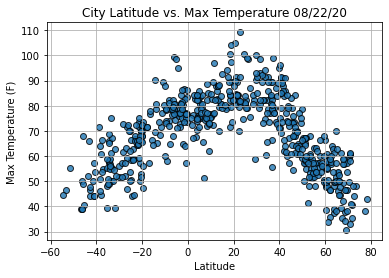

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

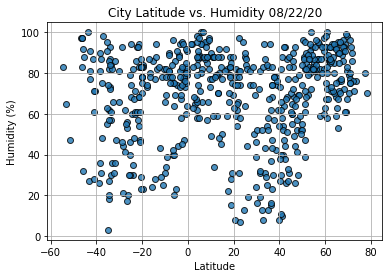

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig2.png")

# Show plot.
plt.show()

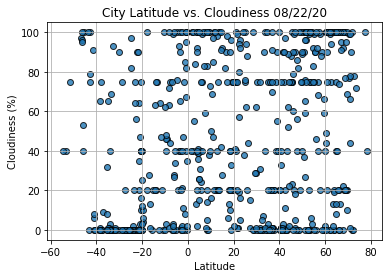

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig3.png")

# Show plot.
plt.show()

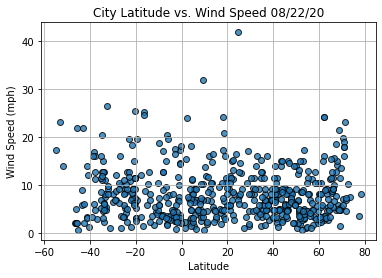

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig4.png")

# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

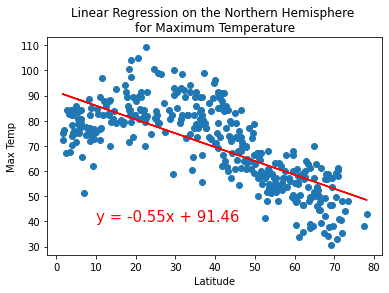

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       (f"Linear Regression on the Northern Hemisphere \n"+"for Maximum Temperature"), 
                       'Max Temp',(10,40))

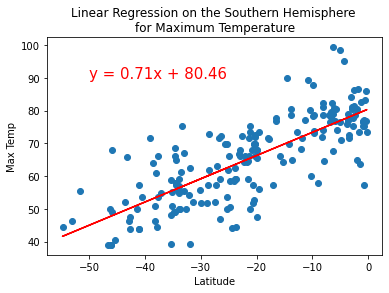

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       (f"Linear Regression on the Southern Hemisphere \n"+"for Maximum Temperature"), 
                       'Max Temp',(-50,90))

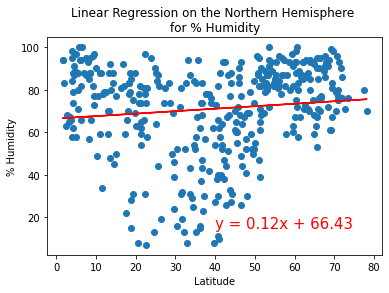

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Northern Hemisphere \n"+"for % Humidity", 
                       '% Humidity',(40,15))

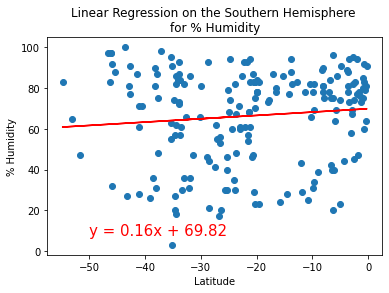

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Southern Hemisphere \n"+"for % Humidity", 
                       '% Humidity',(-50,8))

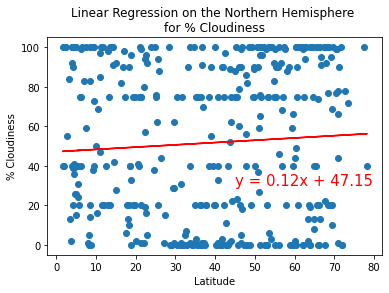

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Northern Hemisphere \n"+"for % Cloudiness", 
                       '% Cloudiness',(45,30))

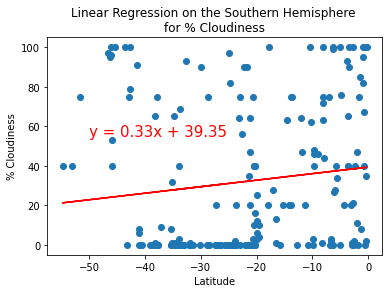

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Southern Hemisphere \n"+"for % Cloudiness", 
                       '% Cloudiness',(-50,55))

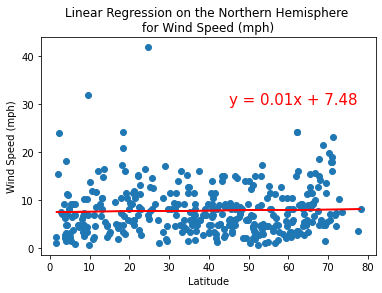

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Northern Hemisphere \n"+"for Wind Speed (mph)", 
                       'Wind Speed (mph)',(45,30))

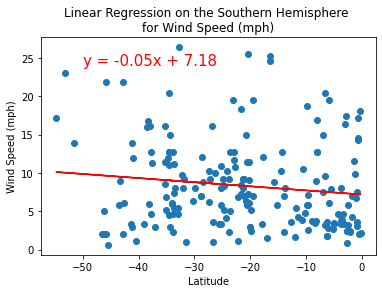

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f"Linear Regression on the Southern Hemisphere \n"+"for Wind Speed (mph)", 
                       'Wind Speed (mph)',(-50,24))